## Setting up
* To run this and following sections by Notebook as independent steps, we first define the 'Experiment' and link it to the current state of the data analysis. Naturally, if you collect all steps in one Notebook you need to do this step only once.
* As an example, we link to a minimal dataset 'papylio_testdata_mini'

In [ ]:
# When running this Notebook from within an IDE (for example, PyCharm), there is no need to re-import papylio; just comment it out.
import papylio as pp
exp = pp.Experiment()

ModuleNotFoundError: No module named 'papylio'

# Step 2: Channel mapping
Description: In this step, we perform channel mapping. The two channels are co-projected into one image, next to each other. Thus, every molecule is imaged twice, one for each channel. These pairs of coordinates need to be mapped onto each other. Here, coordinates of spots in a 'bead image' are used. This mapping will hold for all other imagery in this experiment.

## default use
To perform the mapping, find the index of the mapping file (in the code below it is set to 0), run the mapping and show the mapping result.

  0.  Bead slide\Bead slide
  1.  ssHJ1\ssHJ1 TIRF 561 0001_100_frames
polynomial
Donor: 99, Acceptor: 99
Iteration: 0 	 Mean squared error: 1.558047274859425 	 Number of pairs: 56
Iteration: 1 	 Mean squared error: 0.07817100100152065 	 Number of pairs: 59
Iteration: 2 	 Mean squared error: 0.07817100100152065 	 Number of pairs: 59
Final 		 Mean squared error: 0.06436108737516986 	 Number of pairs: 59
Iterative closest point match
Mean-squared error: 0.06436108737516986
Number of iterations: 2

File(Bead slide\Bead slide) used as mapping


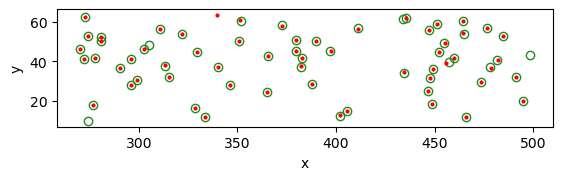

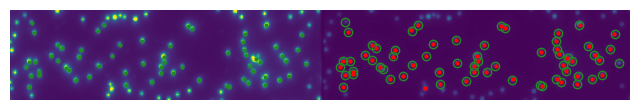

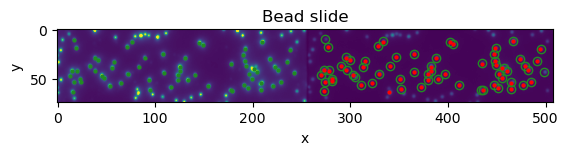

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
exp.files.print()

mapping_file_index = 0 #make sure this index points to the correct file
mapping_file = exp.files[mapping_file_index]

mapping_file.perform_mapping()

figure, axis = mapping_file.show_image()
mapping_file.mapping.show(axis=axis, show_source=True)
plt.show()

### Interpretation and optimization
* make sure that most of the spots in the images are detected. 
* check that detected spots and matched points are homogeneously spread over the field of view. 
* to tune settings: see 'advanced'

### Output:
The mapping is saved in a .mapping file and is automatically loaded when importing an experiment. Note that if multiple mapping files are present, the first mapping file in exp.files is used. So it is good practice to remove the .mapping files that should not be used.

 ## Advanced
Detailed settings are listed in the 'config.yml' file.
* Look for entries under 'mapping'
* Especially the minimum_intensity_difference will need to be adjusted separately for the different emission channels. An initial guess for the value can be determined from the difference between background and molecule intensity in a plotted image [1] .
